In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.metrics import r2_score
import warnings

In [321]:
# Load the Data
rawD = pd.read_excel('parameters.xlsx',sheet_name="data")
V0 = rawD['V'].values
tp = rawD['t'].values
Tmax = rawD['exp Tmax'].values
Tavg = rawD['exp Tavg'].values
kh = rawD['kh'].values
ht = rawD['ht'].values

display(rawD)

,t,V,exp Tmax,exp Tavg,kh,ht
0,0.01,35,954.4,767.4,0.705323,0.041978
1,0.01,40,1140.3,792.7,0.502800,0.032739
2,0.01,45,1324.3,820.8,0.439332,0.028612
3,0.01,50,1480.1,876.0,0.432066,0.021869
4,0.01,55,1627.5,908.8,0.437141,0.021591
5,0.01,60,1827.8,982.6,0.426451,0.018061
6,0.01,65,1947.8,998.4,0.450827,0.019999
7,0.01,70,2025.6,1003.2,0.491053,0.022837
8,0.02,30,1018.5,769.6,1.003068,0.075498
9,0.02,35,1235.8,821.1,0.790658,0.044545


[-3.57402387e+00  5.52525431e-01  1.51906371e-01  2.62083313e-02
 -1.19143132e-02  2.34268186e-03  1.48637088e+01  3.08368906e-01]


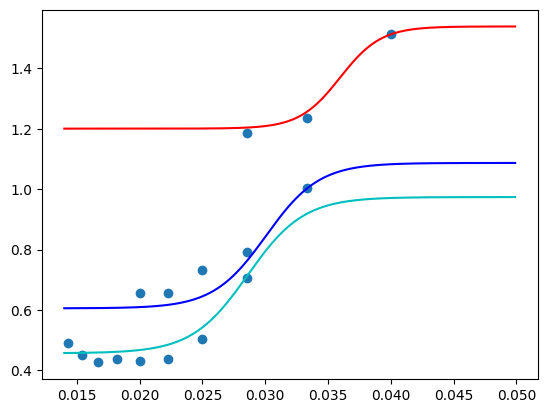

In [294]:
# kh regression
Vr = 1/V0

def sig(x,p,tpv):
    a0 = p[0]*tpv + p[1]
    a1 = p[2]*tpv + p[3]
    a2 = p[4]*tpv + p[5]
    a3 = p[6]*tpv + p[7]
    y= a0/(1+1.48*np.exp(-(x-a1)/a2))+a3
    return y

def lsq(p):
    error = 0
    for i in range(len(Vr)):
        y = sig(Vr[i],p,tp[i])
        error += (kh[i]-y)**2
    return error

x0 = [3.77,0.66,0.2236,0.02706,0.012249,0.002431,14.35613,0.325092]

res = minimize(lsq,x0)

x = res.x
print(x)
xplt = np.arange(0.014,0.05,0.0001)
yplt1 = sig(xplt,x,0.01)
yplt2 = sig(xplt,x,0.02)
yplt3 = sig(xplt,x,0.06)
plt.scatter(Vr,kh)
plt.plot(xplt,yplt1,'c-')
plt.plot(xplt,yplt2,'b-')
plt.plot(xplt,yplt3,'r-')
plt.show()

[ 0.15544343  0.04403907 -0.00157864  0.00443508  0.5941463   0.01316064]


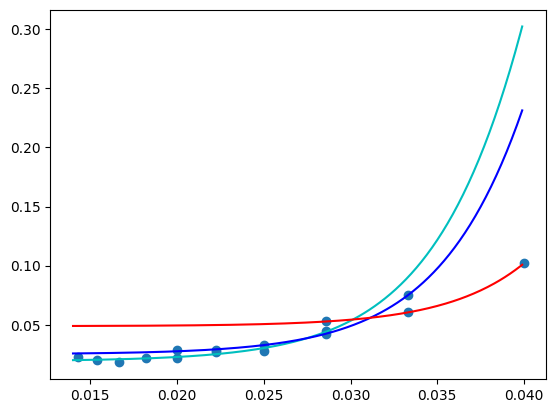

In [325]:
# ht regression
Vr = 1/V0

def sig(x,p,tpv):
    a0 = p[0]*tpv + p[1]
    a1 = p[2]*tpv + p[3]
    a2 = p[4]*tpv + p[5]
    y= 2.139/(1+1.807*np.exp(-(x-a0)/a1))+a2
    return y

def lsq(p):
    error = 0
    for i in range(len(Vr)):
        y = sig(Vr[i],p,tp[i])
        error += (ht[i]-y)**2
    return error

x0 = [0.10939,0.045765,-0.013102214,0.004782806,0.610417,0.013542]

res = minimize(lsq,x0)

x = res.x
print(x)
xplt = np.arange(0.014,0.04,0.0001)
yplt1 = sig(xplt,x,0.01)
yplt2 = sig(xplt,x,0.02)
yplt3 = sig(xplt,x,0.06)
plt.scatter(Vr,ht)
plt.plot(xplt,yplt1,'c-')
plt.plot(xplt,yplt2,'b-')
plt.plot(xplt,yplt3,'r-')
plt.show()

[0.05286424 0.0041426  0.05003289]


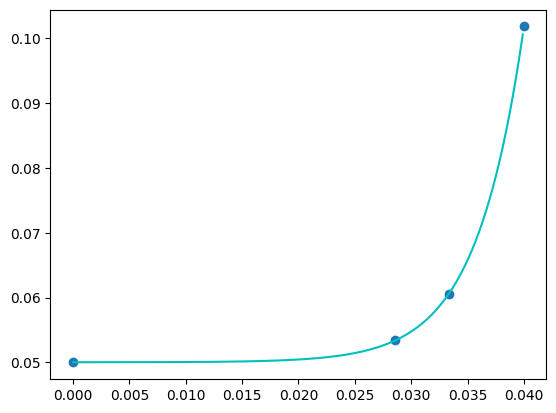

In [320]:
# ht regression intialization
Vr = 1/V0[13:]
ht0 = ht[13:]

Vr = np.append(Vr,0)
ht0 = np.append(ht0,0.05)
def sig(x,p):
    y= 2.13901331/(1+1.80699296*np.exp(-(x-p[0])/p[1]))+p[2]
    return y

def lsq(p):
    y = sig(Vr,p)
    return sum((y-ht0)**2)

x0 = [0.04527312, 0.00379113, 0.02642226]

res = minimize(lsq,x0)

x = res.x
print(x)
xplt = np.arange(0,0.04,0.0001)
yplt1 = sig(xplt,x)
plt.scatter(Vr,ht0)
plt.plot(xplt,yplt1,'c-')
plt.show()

In [ ]:
x001= [0.50597607 ,1.48211142 ,0.02785 ,   0.0015606,  0.4452102 ]
x002= [0.71417943 ,1.47997307 ,0.03200023 ,0.00352269 ,0.64930372]
x003= [0.66099155, 1.47217133 ,0.03891234, 0.00272832, 1.18009256]

In [ ]:
# Time
dt = 1e-4
t = np.arange(dt,1.11+dt,dt)

# Power Function
def power(V0,tp):
    # Power funciton
    wv = np.zeros(len(t))
    a = 0.003
    b = tp
    c = 1e-5
    d = 1.1

    for i in range(len(t)):
        if t[i] < 0.01:
            wv[i] = c
        elif (0.01 <= t[i]) & (t[i] < (0.01+a/2)):
            wv[i] = c + 2/a**2*(t[i]-0.01)**2
        elif (0.01+a/2 <= t[i]) & (t[i] < (0.01+a)):
            wv[i] = c + -2/a**2*(t[i]-0.01-a)**2+1
        elif ((0.01+a) <= t[i]) & (t[i] < (0.01+b-a)):
            wv[i] = c + 1
        elif ((0.01+b-a) <= t[i]) & (t[i] < (0.01+b-a/2)):
            wv[i] =c + -2/a**2*(t[i]-0.01-b+a)**2+1
        elif ((0.01+b-a/2) <= t[i]) & (t[i] < (0.01+b)):
            wv[i] =c + 2/a**2*(t[i]-0.01-b)**2
        else:
            wv[i] = c

    V = V0 * wv
    return V**2/4.418081

In [ ]:
# Heat Balance Function
def heat_balance(x,V0,tp):
    T0 = 730
    T = np.zeros(len(t))+T0
    P = power(V0,tp)
    Q = np.zeros(len(t))
    for i in range(len(Q)-1):
        kh = tp*x[0] + 1/V0*x[1]
        ht = tp*x[2] + 1/V0*x[3]
       
        Cp = kh*0.010783 #J/K       
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - ht*dQ**(1)*(dt)
        T[i+1] = Q/Cp + T[i]

    return T

In [ ]:
# Cost Funciton
def lsq(x):
    error = 0

    for i in range(2):
        Tar = heat_balance(x,V0[i],tp[i])
        Tm = Tar[np.argmax(Tar[:300])]
        Ta = np.average(Tar)
        error += ((Tmax[i]-Tm)/(Tmax[i]))**2 + ((Tavg[i]-Ta)/(Tavg[i]))**2
    return error

In [ ]:

iter = 10
pow = 2
xkh0 = [0.4] + [1e-5 for i in range(pow-1)]
xht0 = [0.02] + [1e-5 for i in range(pow-1)]
bounds=[(0,1),(0,1),(0,0.1),(0,15)]
x0 = xkh0 + xht0
xf = 0
fun = np.inf
funs = 5.2227599382896654
for i in range(iter):
#    bounds = [(1e-6,100),(-100,100),(-100,100),(-100,100),(1e-6,100),(-100,100),(-100,100),(-100,100)]
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        res = minimize(lsq,x0,bounds=bounds)
    if fun > res.fun:
        fun = res.fun
        x0 = res.x
        xf = res.x
        x0 = np.random.normal(loc=1,scale=0.05,size=len(x0))*x0
    else:
        x0 = np.random.normal(loc=1,scale=0.05,size=len(x0))*xf
    # if i % 100 == 0:
    print(f'Iter:[{i}/{iter}], fun: {fun/funs*100}%')

Iter:[0/10], fun: 8.243871439300134%
Iter:[1/10], fun: 8.243871439300134%
Iter:[2/10], fun: 8.243871439300134%
Iter:[3/10], fun: 8.243871439300134%
Iter:[4/10], fun: 8.243871439300134%


KeyboardInterrupt: 

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.0049581793102381295
        x: [ 5.739e-01  0.000e+00  3.426e-02  4.158e-06]
      nit: 4
      jac: [-5.328e-03  1.257e+00 -1.360e-02  1.853e-03]
     nfev: 30
     njev: 6
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


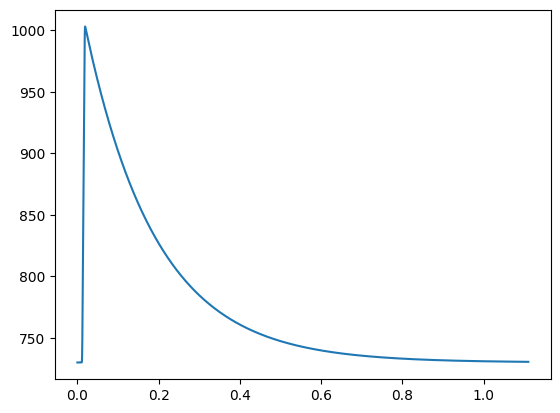

In [ ]:
print(res)
resT = heat_balance(xf,V0[0],tp[0])
plt.plot(t,resT)
plt.show()

In [ ]:
print(xf)

[0.5787316  0.         0.03576105 0.        ]


In [ ]:
print(res)
for i in range(len(V0)):
    resT = heat_balance(res,V0[i],tp[i])
    print(resT[np.argmax(resT)])
    print(np.average(resT))


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.0049581793102381295
        x: [ 5.739e-01  0.000e+00  3.426e-02  4.158e-06]
      nit: 4
      jac: [-5.328e-03  1.257e+00 -1.360e-02  1.853e-03]
     nfev: 30
     njev: 6
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


KeyError: 0

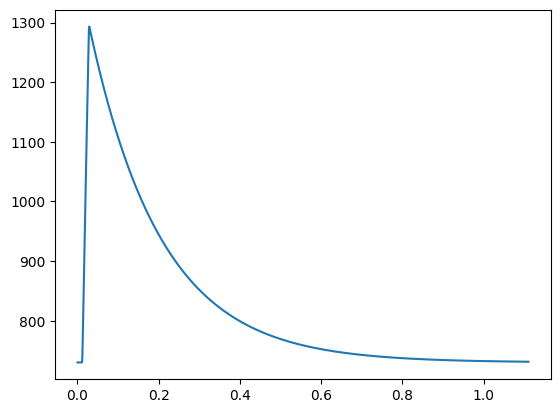

1293.3575950154054
824.2198187349854


In [ ]:
plt.plot(t,resT)
plt.show()
print(resT[np.argmax(resT)])
print(np.average(resT))